In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
import skimage
from skimage import feature
from skimage.filters import gabor_kernel
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
import os

در این قسمت تصویر خوانده شده ، دو کاناله شده و نمایش داده میشود.

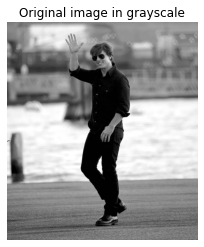

In [3]:
# loading the image
img = cv2.imread('gdrive/My Drive/CVLab/LAB7/image.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Original image in grayscale')
plt.show()

### LBP

در قسمت زیر فیلتر ال بی پی با سایز پنجره ۱۶ پیکسلی و سلول های ۸ پیکسلی روی تصویر اعمال میشود. سپس تصویر فیلتر شده نمایش داده شده است و همانگونه که دیده میشود ویژگی های بارز تصویر توسط فیلتر استخراج شده اند.

In [ ]:
lbp = feature.local_binary_pattern(img_gray, 16, 8)

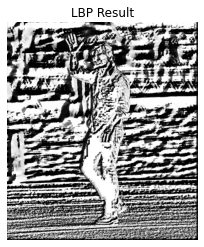

In [ ]:
plt.imshow(lbp, cmap='gray')
plt.title('LBP Result')
plt.axis('off')
plt.show()

### Gabor

در قسمت زیر فیلتر گابور با سایز کرنل ۲۵، انحراف معیار گوسی ۸، طول موج سینوسی ۱۰ و به ازای زوایای ۴۵،۹۰،۱۳۵،۱۸۰ روی تصویر اعمال میشود. تصاویر فیلتر شده به ازای زوایای مختلف فیلتر گابور نشان داده شده اند. همانطور که دیده میشود برای هر زاویه ویژگی ها در راستای همان زاویه استخراج شده اند.

In [ ]:
from matplotlib.lines import ls_mapper
thetas = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
ksize = 25
sigma = 8
lm = 10
gamma = 0.5
phase = 0

filtered_images = []

for theta in thetas:
  gabor = cv2.getGaborKernel([ksize, ksize], sigma, theta, lm, gamma, phase)     # gabor kernel
  filtered_img = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor)                     
  filtered_images.append(filtered_img)

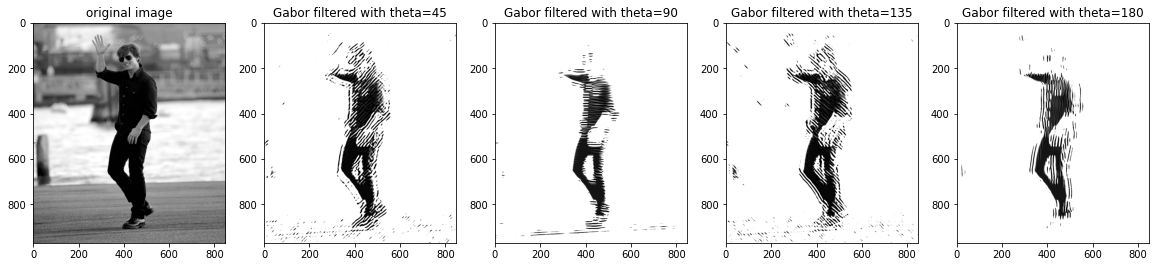

In [ ]:
# plotting filtered images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(filtered_images[0], cmap='gray')
ax[1].set_title('Gabor filtered with theta=45')
ax[2].imshow(filtered_images[1], cmap='gray')
ax[2].set_title('Gabor filtered with theta=90')
ax[3].imshow(filtered_images[2], cmap='gray')
ax[3].set_title('Gabor filtered with theta=135')
ax[4].imshow(filtered_images[3], cmap='gray')
ax[4].set_title('Gabor filtered with theta=180')
plt.show()

changing Gabor parameters:

در قسمت زیر فیلتر گابور به ازای انحراف معیار های ۴،۱۶،۶۴ ( و با ثابت نگه داشتن بقیه پارامترها) روی تصویر اعمال شده و نتایج نمایش داده شده اند. همانطور که دیده میشود به ازای انحراف معیار های بزرگتر ویژگی های بیشتری استخراج شده اند.

In [ ]:
gabor1 = cv2.getGaborKernel([25, 25], 4, np.pi/4, 10, 0.5, 0)    # sigma=4
filtered_img1 = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor1)

gabor2 = cv2.getGaborKernel([25, 25], 16, np.pi/4, 10, 0.5, 0)   # sigma=16
filtered_img2 = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor2)

gabor3 = cv2.getGaborKernel([25, 25], 64, np.pi/4, 10, 0.5, 0)   # sigma=64
filtered_img3 = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor3)

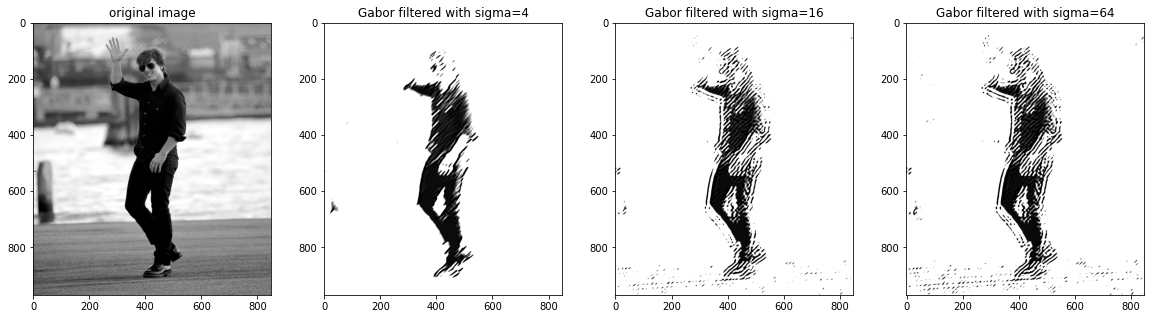

In [ ]:
# plotting filtered images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(filtered_img1, cmap='gray')
ax[1].set_title('Gabor filtered with sigma=4')
ax[2].imshow(filtered_img2, cmap='gray')
ax[2].set_title('Gabor filtered with sigma=16')
ax[3].imshow(filtered_img3, cmap='gray')
ax[3].set_title('Gabor filtered with sigma=64')
plt.show()

در قسمت زیر فیلتر گابور به ازای طول موج های ۸،۱۶،۳۲ ( با ثابت نگه داشتن بقیه پارامترها) روی تصویر اعمال میشوند. نتایج نشان داده شده اند. همانطور که دیده میشود به ازای طول موج های کوچکتر ویژگی های بیشتری استخراج شده اند به طوری که عملکرد فیلتر با انحراف معیار ۳۲ خیلی پایین میباشد.

In [ ]:
gabor4 = cv2.getGaborKernel([25, 25], 16, np.pi/4, 8, 0.5, 0)    # lambda=8
filtered_img4 = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor4)

gabor5 = cv2.getGaborKernel([25, 25], 16, np.pi/4, 16, 0.5, 0)    # lambda=16
filtered_img5 = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor5)

gabor6 = cv2.getGaborKernel([25, 25], 16, np.pi/4, 32, 0.5, 0)    # lambda=32
filtered_img6 = cv2.filter2D(img_gray, cv2.CV_8UC3, gabor6)

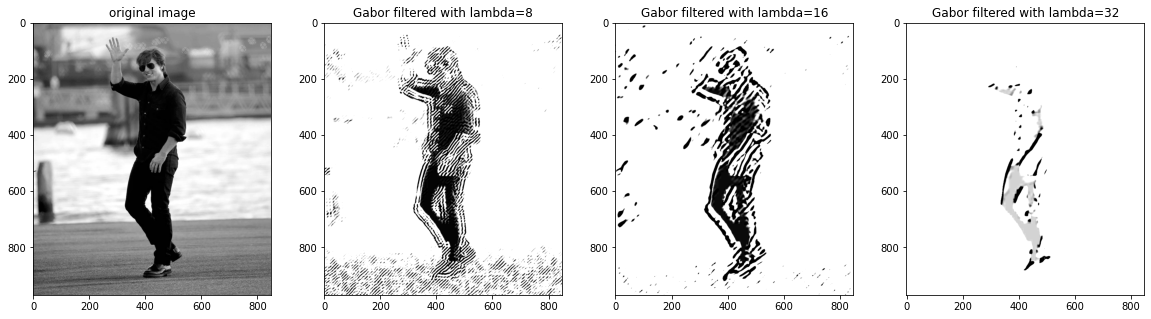

In [ ]:
# plotting filtered images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(filtered_img4, cmap='gray')
ax[1].set_title('Gabor filtered with lambda=8')
ax[2].imshow(filtered_img5, cmap='gray')
ax[2].set_title('Gabor filtered with lambda=16')
ax[3].imshow(filtered_img6, cmap='gray')
ax[3].set_title('Gabor filtered with lambda=32')
plt.show()

## HOG:

### part 1:

در این قسمت با استفاده از تابع اماده برای روش هوگ, مکان شخص پیدا میشود. مقدار پارامترهای تابع با استفاده از آزمون و خطا به دست امده اند.

In [76]:
# HOG descriptor
hog = cv2.HOGDescriptor()
# SVM for people detection
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
# detect the person in input image
(locs, _) = hog.detectMultiScale(img, winStride=(8, 8), padding=(8, 8), scale=1.5)

In [77]:
# draw rectangle over the detected person
img_copy = img.copy()
for x, y, w, h in locs:
  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 0, 0), 10)

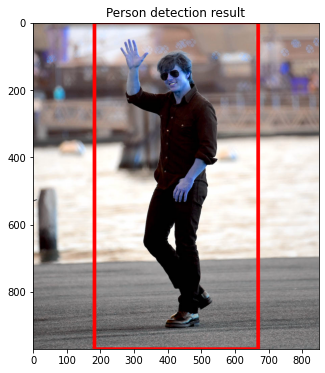

In [78]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(img_copy)
plt.title('Person detection result')
plt.show()

### part 2:

در قسمت زیر تصاویر مربوط به مجموعه های خوشحال و بیزار خوانده شده و روی هر تصویر ماسک اعمال میشود به طوری که تصویر نهایی فقط شامل صورت افراد باشد. پس از اعمال ماسک تصویر به ابعاد ۱۲۸ در ۱۲۸  تغییر یافته و سپس روی هر تصویر تابع هوگ اعمال میشود. از انجایی که کل تصویر باید به عنوان یک پنجره در نظر گرفته شود، هر سلول در تابع هوگ حاوی ۸ در ۸ پیکسل و هر بلوک حاوی ۱۶ در ۱۶ سلول است.

In [ ]:
dataPath_happy = 'gdrive/My Drive/CVLab/LAB1/Data/Cohn-Kanade/happy'
dataPath_disgust  = 'gdrive/My Drive/CVLab/LAB1/Data/Cohn-Kanade/disgust'

In [ ]:
data_happy = []
labels_happy = []

data_disgust = []
labels_disgust = []

#winSize = (64, 64)
#blockSize = (16,16)
#blockStride = (4, 4)
#cellSize = (8,8) 
#nbins = 9         
#hog = cv2.HOGDescriptor(winSize,  blockSize, blockStride, cellSize, nbins)     

for file in os.listdir(dataPath_happy):
        if file[-3:] in {'jpg', 'png'}:
              im = cv2.imread(dataPath_happy +'/' + file, 0)   # read image in grayscale
              im = cv2.resize(im, (75, 150) )
              im = im[30:125, 0:75]   # mask  
              im = cv2.resize(im, (128, 128))                   
              im_hog, im_hog_image = hog(im, pixels_per_cell=(8, 8),  cells_per_block=(16, 16), visualize=True, block_norm='L2-Hys') # hog
 
              data_happy.append(im_hog)
              labels_happy.append('happy')

for file in os.listdir(dataPath_disgust):
        if file[-3:] in {'jpg', 'png'}:
              im = cv2.imread(dataPath_disgust +'/' + file,0)  # read image in grayscale
              im = cv2.resize(im, (75, 150) )
              im = im[30:125, 0:75]                         # mask
              im = cv2.resize(im, (128, 128))  
              im_hog, im_hog_image = hog(im, pixels_per_cell=(8, 8),  cells_per_block=(16, 16), visualize=True, block_norm='L2-Hys') # hog

              data_disgust.append(im_hog)
              labels_disgust.append('disgust')

در قسمت زیر ۳۵ تصویر از مجموعه بیزار و ۶۵ تصویر از مجموعه خوشحال به صورت تصادفی به عنوان مجموعه اموزش و مابقی نمونه ها به عنوان مجموعه تست جدا میشود.

In [ ]:
# train test split
X_train_happy , X_test_happy , y_train_happy , y_test_happy = train_test_split(data_happy, labels_happy ,train_size=65 ,random_state=42)
X_train_disgust , X_test_disgust , y_train_disgust , y_test_disgust  = train_test_split(data_disgust, labels_disgust  ,train_size=35 ,random_state=42)

In [ ]:
X_train_total = X_train_happy + X_train_disgust
y_train_total = y_train_happy + y_train_disgust
X_test_total = X_test_happy + X_test_disgust
y_test_total = y_test_happy + y_test_disgust

در قسمت زیر یک طبقه بند اس وی ام خطی روی نمونه های اموزش، ترین میشود. سپس با استفاده از این طبقه بند، لیبل های نمونه های تست پیش بینی میشوند. در انتها خطای اموزش و تست نمایش داده شده اند که عملکرد خیلی خوب این طبقه بند را نشان میدهند. همچنین ماتریس درهم ریختگی در پایان نمایش داده شده است.

In [ ]:
clf = make_pipeline(StandardScaler(), LinearSVC())
clf.fit(X_train_total, y_train_total)
y_test_predicted = clf.predict(X_test_total) # predicted labels
print('train accuracy:',clf.score(X_train_total,y_train_total))
print('test  accuracy:',clf.score(X_test_total,y_test_total))

train accuracy: 1.0
test  accuracy: 0.90625


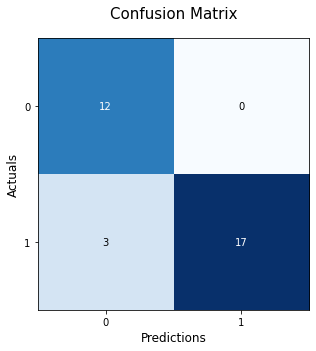

In [ ]:
conf_mat = confusion_matrix(y_test_total, y_test_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()